In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data[:, [2, 3]]
y = iris.target
print("Class labels:", np.unique(y))

Class labels: [0 1 2]


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

In [6]:
print("Labels counts in y:", np.bincount(y))

Labels counts in y: [50 50 50]


In [7]:
print("Labels counts in y_train:", np.bincount(y_train))

Labels counts in y_train: [35 35 35]


In [8]:
print("Labels counts in y_test", np.bincount(y_test))

Labels counts in y_test [15 15 15]


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()

In [11]:
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
X_train_std = sc.transform(X_train)

In [13]:
X_test_std = sc.transform(X_test)

In [14]:
from sklearn.linear_model import Perceptron

In [15]:
ppn = Perceptron(n_iter = 40, eta0 = 0.1, random_state = 1)
ppn.fit(X_train_std, y_train)

/Users/mito/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=None, n_iter=40, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=1, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [16]:
y_pred = ppn.predict(X_test_std)
print("Misclassified samples: %d" % (y_test != y_pred).sum())

Misclassified samples: 9


In [17]:
from sklearn.metrics import accuracy_score

In [18]:
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))

Accuracy: 0.80


In [19]:
print("Accuracy: %.2f" % ppn.score(X_test_std, y_test))

Accuracy: 0.80


In [20]:
%run -i tools.py

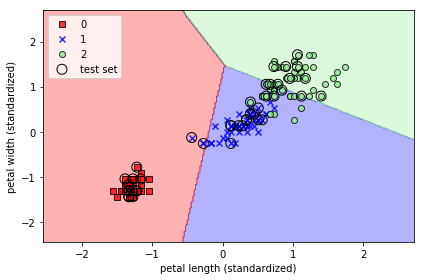

In [21]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions2(X = X_combined_std, y = y_combined, classifier = ppn,
                       test_idx = range(105,150))
plt.xlabel("petal length (standardized)")
plt.ylabel("petal width (standardized)")
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

In [22]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

In [23]:
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

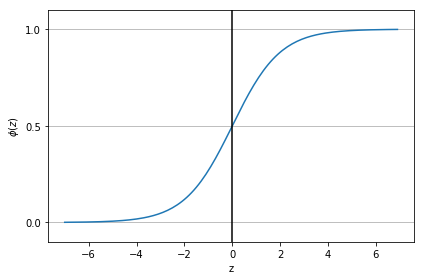

In [24]:
plt.plot(z, phi_z)
plt.axvline(0.0, color = "k")
plt.ylim(-0.1, 1.1)
plt.xlabel("z")
plt.ylabel("$\phi (z)$")
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

In [25]:
def cost_1(z):
    return -np.log(sigmoid(z))

In [26]:
def cost_0(z):
    return -np.log(1-sigmoid(z))

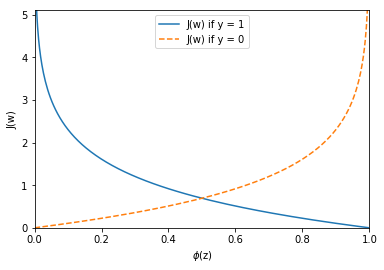

In [27]:
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c1, label = "J(w) if y = 1")
plt.plot(phi_z, c0, linestyle = "--",label = "J(w) if y = 0")
plt.ylim(0.0, 5.1)
plt.xlim([0,1])
plt.xlabel("$\phi$(z)")
plt.ylabel("J(w)")
plt.legend(loc = "upper center")
#plt.tight_layout()
plt.show()

In [28]:
%run -i Logisticregression.py

In [29]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)] # extract setosa(y = 0) and versicolor(y = 1)
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

In [30]:
lrgd = LogisticRegressionGD(eta = 0.05, n_iter = 1000, random_state = 1)

In [31]:
lrgd.fit(X_train_01_subset, y_train_01_subset)

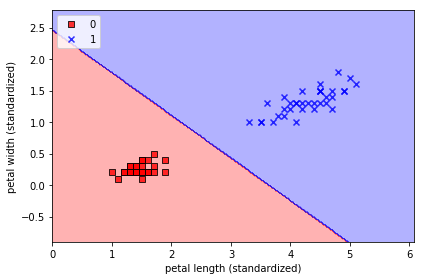

In [32]:
plot_decision_regions2(X = X_train_01_subset,
                       y = y_train_01_subset,
                       classifier = lrgd)
plt.xlabel("petal length (standardized)")
plt.ylabel("petal width (standardized)")
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr = LogisticRegression(C = 100.0, random_state = 1)
lr.fit(X_train_std, y_train)

/Users/mito/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mito/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

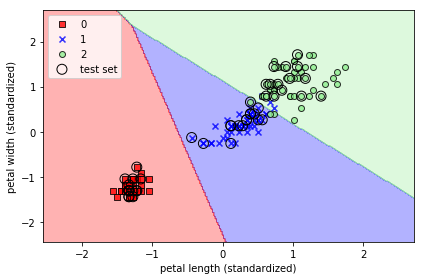

In [35]:
plot_decision_regions2(X = X_combined_std,
                       y = y_combined,
                       classifier = lr,
                       test_idx = range(105,150))
plt.xlabel("petal length (standardized)")
plt.ylabel("petal width (standardized)")
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

In [36]:
lr.predict_proba(X_test_std[:5,:])#.sum(axis = 1)

array([[3.17983737e-08, 1.44886616e-01, 8.55113353e-01],
       [8.33962295e-01, 1.66037705e-01, 4.55557009e-12],
       [8.48762934e-01, 1.51237066e-01, 4.63166788e-13],
       [4.99047943e-05, 6.42479627e-01, 3.57470468e-01],
       [3.50271500e-04, 9.72567065e-01, 2.70826638e-02]])

In [37]:
lr.predict_proba(X_test_std[:5, :]).argmax(axis = 1)

array([2, 0, 0, 1, 1])

In [38]:
lr.predict(X_test_std[:5, :])

array([2, 0, 0, 1, 1])

In [39]:
lr.predict(X_test_std[0, :].reshape(1, -1)) # if data has only one row, it is needed to convert to 2 dim array

array([2])

In [40]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C = 10.**c, random_state = 1, solver = "lbfgs")
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

/Users/mito/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mito/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/mito/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mito/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/mito/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logisti

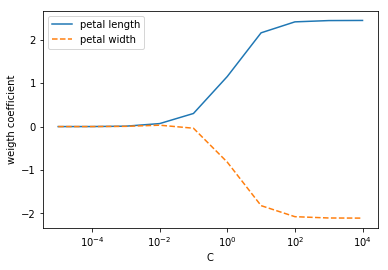

In [41]:
weights = np.array(weights)
plt.plot(params, weights[:, 0], label = "petal length")
plt.plot(params, weights[:, 1], linestyle = "--", label = "petal width")
plt.ylabel("weigth coefficient")
plt.xlabel("C")
plt.legend(loc = "upper left")
plt.xscale("log")
plt.show()

In [42]:
# Support Vector Machine
from sklearn.svm import SVC

In [43]:
svm = SVC(kernel = "linear", C = 1., random_state = 1)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False)

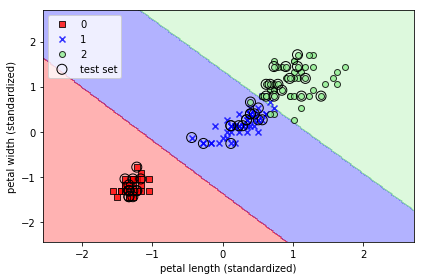

In [44]:
plot_decision_regions2(X = X_combined_std,
                       y = y_combined,
                       classifier = svm,
                       test_idx = range(105, 150))
plt.xlabel("petal length (standardized)")
plt.ylabel("petal width (standardized)")
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

In [45]:
# perceptron, logistic regression and support vector machine with stochastic gradient descent method
from sklearn.linear_model import SGDClassifier

In [46]:
ppn = SGDClassifier(loss = "perceptron")
lr = SGDClassifier(loss = "log")
svm = SGDClassifier(loss = "hinge")

In [47]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

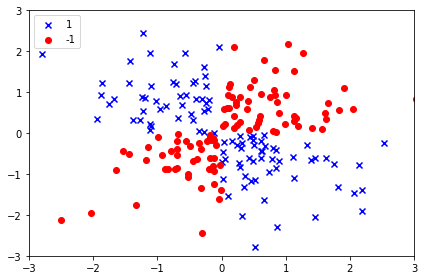

In [48]:
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1],
            c = "b", marker = "x", label = "1")
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1],
            c = "r", marker = "o", label = "-1")
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

In [49]:
# kernel function
svm = SVC(kernel = "rbf", random_state = 1, gamma = 0.10, C = 10.)
svm.fit(X_xor, y_xor)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

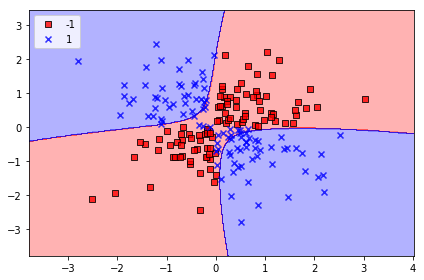

In [50]:
plot_decision_regions2(X_xor, y_xor, classifier = svm)
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

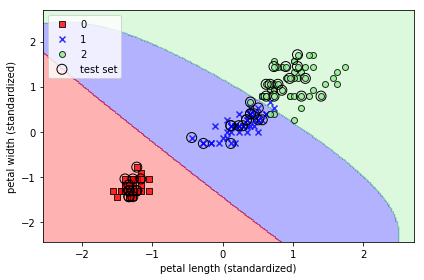

In [51]:
svm = SVC(kernel = "rbf", random_state = 1, gamma = 0.2, C = 1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions2(X_combined_std, y_combined, classifier = svm,
              test_idx = range(105, 150))
plt.xlabel("petal length (standardized)")
plt.ylabel("petal width (standardized)")
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

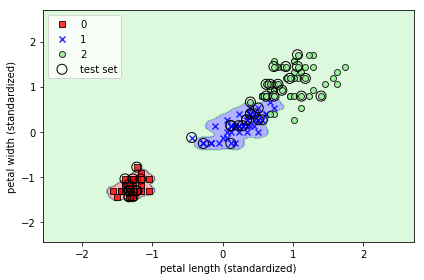

In [52]:
svm = SVC(kernel = "rbf", random_state = 1, gamma = 100., C = 1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions2(X_combined_std, y_combined, classifier = svm,
              test_idx = range(105, 150))
plt.xlabel("petal length (standardized)")
plt.ylabel("petal width (standardized)")
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

In [53]:
def gini(p):
    return p*(1 - p) + (1 - p)*(1 - (1 - p))

def entropy(p):
    return -p*np.log2(p) - (1-p)*np.log2(1-p)

def error(p):
    return 1 - np.max([p, 1-p])

In [54]:
x = np.arange(0., 1., .01)
ent = [entropy(i) if i != 0 else None for i in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

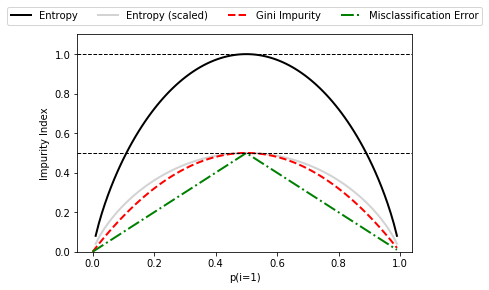

In [55]:
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                          ["Entropy", "Entropy (scaled)",
                           "Gini Impurity", "Misclassification Error"],
                          ["-", "-", "--", "-."],
                          ["black", "lightgray", "red", "green", "cyan"]):
    line = ax.plot(x, i, label = lab, linestyle = ls, lw = 2, color = c)
    
ax.legend(loc = "upper center", bbox_to_anchor = (0.5, 1.15),
          ncol = 5, fancybox = True, shadow = False)

ax.axhline(y = 0.5, linewidth = 1, color = "k", linestyle = "--")
ax.axhline(y = 1., linewidth = 1, color = "k", linestyle = "--")
plt.ylim([0., 1.1])
plt.xlabel("p(i=1)")
plt.ylabel("Impurity Index")
plt.show()

In [56]:
# Classification with Decision Tree
from sklearn.tree import DecisionTreeClassifier

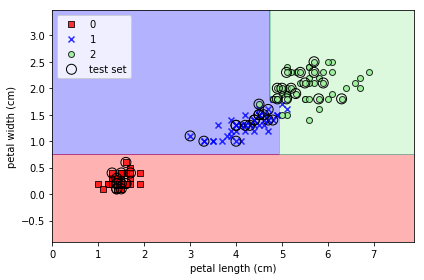

In [57]:
tree = DecisionTreeClassifier(criterion = "gini", max_depth = 4, random_state = 1)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions2(X_combined, y_combined, classifier = tree, test_idx = range(105, 150))
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

In [64]:
!pip install pydotplus
!pip install graphviz
!pip install pyparsing

  Using cached https://files.pythonhosted.org/packages/f5/74/dbed754c0abd63768d3a7a7b472da35b08ac442cf87d73d5850a6f32391e/graphviz-0.13.2-py2.py3-none-any.whl


In [62]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

In [66]:
dot_data = export_graphviz(tree,
                           filled = True,
                           rounded = True,
                           class_names = ["Setosa", "Versicolor", "Virginica"],
                           feature_names = ["petal length", "petal width"],
                           out_file = None)
graph = graph_from_dot_data(dot_data)
graph.write_png("tree.png") # Won't work

InvocationException: GraphViz's executables not found

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
forest = RandomForestClassifier(criterion = "gini", n_estimators = 25, random_state = 1, n_jobs = 2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=2,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

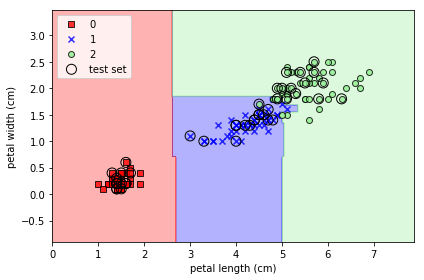

In [69]:
plot_decision_regions2(X_combined, y_combined, classifier = forest, test_idx = range(105, 150))
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

In [70]:
from sklearn.neighbors import KNeighborsClassifier

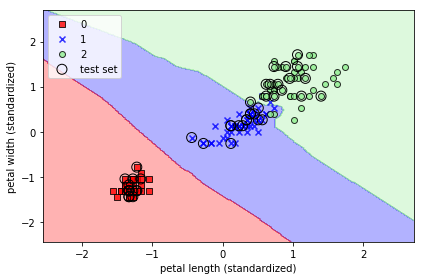

In [71]:
knn = KNeighborsClassifier(n_neighbors = 5, p = 2, metric = "minkowski")
knn.fit(X_train_std, y_train)
plot_decision_regions2(X_combined_std, y_combined, classifier = knn, test_idx = range(105, 150))
plt.xlabel("petal length (standardized)")
plt.ylabel("petal width (standardized)")
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

In [72]:
# chap 4
from io import StringIO

In [80]:
csv_data = """A, B, C, D
              1., 2., 3., 4.
              5., 6.,,8.
              10., 11., 12."""
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [74]:
df.isnull().sum()

A     0
 B    0
 C    1
 D    1
dtype: int64

In [75]:
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [76]:
df.dropna(axis = 1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [77]:
df.dropna(how = "all")

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [78]:
df.dropna(thresh = 4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [86]:
df.dropna(subset = [" C"])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [87]:
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values="NaN", strategy = "mean", axis = 0)
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

/Users/mito/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])